In [6]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# neural net
from sklearn.neural_network import MLPClassifier 
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # use this for consistency
from sklearn.feature_extraction import DictVectorizer # if needed
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ParameterGrid

In [22]:
# visual
!pip install pydotplus
!pip install pydot


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [128]:
# decision tree
from sklearn import preprocessing, tree
from sklearn import ensemble

### Data dictionary

Survived : Survival, 0 = No, 1 = Yes; (target)

Pclass : Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd (see variable notes)

Sex : Sex

Age: Age in years

SibSp: Number of siblings / spouses aboard the Titanic

Parch: Number of parents / children aboard the Titanic (see variable notes)

Ticket: Ticket number

Fare: Passenger fare

Cabin: Cabin number

Embarked: Part of Embarkation (yes it's a word), C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes
Pclass is a proxy for socio-economic status (SES) where 1st = Upper, 2nd = Middle, 3rd = Lower

Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5 (see entry where PassengerID = 58)

Parch can be 0 for children because some children travelled only with a nanny

# Data loading

In [279]:
# loading data, filepath based on deepnote directory
df_train = pd.read_csv('/work/train.csv')
df_test = pd.read_csv('/work/test.csv')
df_train['Sex'] = LabelEncoder().fit_transform(df_train['Sex'])
df_test['Sex'] = LabelEncoder().fit_transform(df_test['Sex'])

In [186]:
# preview data
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket Prefix,Ticket Number,Prefix Probability
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A5,,0.023837
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC,,0.068104
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STONO2,,0.020431
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,_,_,0.754824
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,_,_,0.754824
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,_,_,0.754824
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,_,_,0.754824
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,_,_,0.754824
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,_,_,0.754824
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,_,_,0.754824


In [181]:
print(len(df_test))
df_test

418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Playground

In [268]:
# Prefix encoding
tickets = df_train['Ticket'].str.extract(r"(.+\s|\w+\s)(\d*)*")
tickets.fillna('_', inplace=True)
df_train[['Ticket Prefix','Ticket Number']] = tickets
df_train['Ticket Prefix'] = df_train['Ticket Prefix'].str.replace(r"\.| |\/",'', regex=True).str.upper()
print(df_train['Ticket Prefix'].value_counts())
drop_prefixes_test = df_train['Ticket Prefix'].value_counts()[df_train['Ticket Prefix'].value_counts() <= 1].index
df_train = df_train[~df_train['Ticket Prefix'].isin(drop_prefixes_test)] # drop_prefixes_test
df_train['Ticket Prefix'].value_counts()

Ticket Prefix
_            665
PC            60
CA            41
A5            21
STONO2        18
SOTONOQ       15
SCPARIS       11
WC            10
A4             7
SOC            6
FCC            5
C              5
SOPP           3
PP             3
WEP            3
PPP            2
SCAH           2
SOTONO2        2
SWPP           2
FC             1
SCAHBASLE      1
AS             1
SP             1
SC             1
SCOW           1
FA             1
SOP            1
SCA4           1
CASOTON        1
Name: count, dtype: int64


Ticket Prefix
_          665
PC          60
CA          41
A5          21
STONO2      18
SOTONOQ     15
SCPARIS     11
WC          10
A4           7
SOC          6
C            5
FCC          5
PP           3
WEP          3
SOPP         3
SWPP         2
PPP          2
SCAH         2
SOTONO2      2
Name: count, dtype: int64

In [167]:
# probability encoding — prefixes
# df_train['Prefix Probability'] = df_train['Ticket Prefix'].value / df_train.shape[0]
probabilities = df_train['Ticket Prefix'].value_counts() / df_train.shape[0]
df_train['Prefix Probability'] = df_train['Ticket Prefix'].map(probabilities)
df_train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket Prefix,Ticket Number,Prefix Probability
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,A5,,0.023837
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,PC,,0.068104
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STONO2,,0.020431
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,_,_,0.754824
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,_,_,0.754824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,_,_,0.754824
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,_,_,0.754824
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,WC,,0.011351
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,_,_,0.754824


In [215]:
print(df_train['Cabin'].str.extract(r"([A-Za-z]+)").value_counts())
print(df_train['Ticket Prefix'].unique())
df_train = df_train[df_train['Deck']!='T']
df_train[df_train['Sex']==2]

C    59
B    46
D    32
E    32
A    15
F    13
G     4
Name: count, dtype: int64
['A5' 'PC' 'STONO2' '_' 'PP' 'CA' 'SCPARIS' 'A4' 'SOC' 'WC' 'SOTONOQ'
 'WEP' 'C' 'FCC' 'SWPP' 'PPP' 'SCAH' 'SOPP' 'SOTONO2']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket Prefix,Ticket Number,Deck


In [239]:
def impute_decks(df_na, df_notna, col):
    # assert col is last in df
    shuffled_df = df_na.sample(frac=1, random_state=42)
    counts = df_notna[col].value_counts()
    dist_counts = (counts / sum(counts) * shuffled_df.shape[0]).astype(int)
    index = 0
    if dist_counts.shape[0] > 1:
        for d in dist_counts.index[:-1]:
            df_na.iloc[index:index+dist_counts[d], -1] = d
            index = index+dist_counts[d]
        df_na.iloc[index:, -1] = dist_counts.index[-1]
    else:
        df_na.iloc[:,-1] = dist_counts.index[0]
    return df_na

In [240]:
# impute underscore deck

df_train['Deck'] = df_train['Cabin'].str.extract(r"([A-Za-z]+)")
all_decks_train = df_train[~df_train['Deck'].isnull()]

prefixes = df_train['Ticket Prefix'].unique()
valid_decks = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

null_groups = all_decks_train[all_decks_train['PassengerId'] == 0]

for prefix in prefixes:
    prefix_df = df_train[df_train['Ticket Prefix'] == prefix]
    prefix_df_notna = prefix_df[~prefix_df['Deck'].isnull()]
    prefix_df_na = prefix_df[prefix_df['Deck'].isnull()]

    if prefix[0] in valid_decks: # check if ticket prefix matches deck
        prefix_df_na['Deck'] = prefix[0]
        prefix_df = pd.concat([prefix_df_notna,prefix_df_na])
        all_decks_train = pd.concat([all_decks_train,prefix_df_na])
    elif prefix_df_notna.shape[0] == 0: # 
        null_groups = pd.concat([null_groups, prefix_df])
    else: # impute based on distribution
        prefix_df_na = impute_decks(prefix_df_na, prefix_df_notna, 'Deck')
        all_decks_train = pd.concat([all_decks_train,prefix_df_na])
    
null_groups = impute_decks(null_groups, df_train[~df_train['Deck'].isnull()], 'Deck')
all_decks_train = pd.concat([all_decks_train,null_groups])

all_decks_train

/tmp/ipykernel_41/1206485184.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prefix_df_na['Deck'] = prefix[0]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket Prefix,Ticket Number,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,PC,,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,_,_,C
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,_,_,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S,PP,,G
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S,_,_,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",0,28.0,1,0,P/PP 3381,24.0000,NaN,C,PPP,,F
432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",0,42.0,1,0,SC/AH 3085,26.0000,NaN,S,SCAH,,G
594,595,0,2,"Chapman, Mr. John Henry",1,37.0,1,0,SC/AH 29037,26.0000,NaN,S,SCAH,,G
761,762,0,3,"Nirva, Mr. Iisakki Antino Aijo",1,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S,SOTONO2,,G


In [170]:

# # attaching deck to training set
# df_train['Deck'] = deck_assignments_train['Deck']

# # probability encoding — deck
# deck_probabilities = df_train['Deck'].value_counts() / df_train.shape[0]
# print(deck_probabilities)
# df_train['Deck Probability'] = df_train['Deck'].map(deck_probabilities)
# df_train

In [299]:
# # impute rows with ticket prefixes using max deck appearance
# df_train_no_ = df_train[df_train['Ticket Prefix'] != '_']

# clean_deck = cabin_notna[cabin_notna['Ticket Prefix'] != '_'].groupby(['Ticket Prefix']).agg(pd.Series.mode)['Deck'].to_dict()
# df_train_no_['Deck'] = df_train_no_['Ticket Prefix'].apply(lambda x: clean_deck.get(x))
# df_train_no_[df_train_no_['Deck'].isnull()]

/tmp/ipykernel_41/2958764835.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_no_['Deck'] = df_train_no_['Ticket Prefix'].apply(lambda x: clean_deck.get(x))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket Prefix,Ticket Number,Prefix Probability,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S,A5,,0.023837,None
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,STONO2,,0.020431,None
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.050,NaN,S,A5,,0.023837,None
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.050,NaN,S,A5,,0.023837,None
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.800,NaN,S,A4,,0.007946,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,817,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.925,NaN,S,STONO2,,0.020431,None
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.450,NaN,S,C,,0.005675,None
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.925,NaN,S,SOTONO2,,0.002270,None
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.000,NaN,C,PPP,,0.002270,None


In [242]:
df_rand = df_train.sample(frac=1, random_state=42)
split_i = int(len(df_rand)*0.8)
train_rand = df_rand.iloc[:split_i]
train_rand = train_rand.drop(['Name','Ticket','PassengerId','Cabin'], axis=1).dropna()

test_rand = df_rand.iloc[split_i:]
test_rand = test_rand.drop(['Name','Ticket','PassengerId','Cabin'], axis=1).dropna()

In [204]:
X_train = train_rand.drop(['Survived'], axis=1)
y_train = train_rand['Survived']

X_test = test_rand.drop(['Survived'], axis=1)
y_test = test_rand['Survived']

In [205]:
train_rand

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket Prefix,Ticket Number,Prefix Probability
355,0,3,male,28.00,0,0,9.5000,S,_,_,0.754824
259,1,2,female,50.00,0,1,26.0000,S,_,_,0.754824
498,0,1,female,25.00,1,2,151.5500,S,_,_,0.754824
399,1,2,female,28.00,0,0,12.6500,S,_,_,0.754824
30,0,1,male,40.00,0,0,27.7208,C,PC,,0.068104
...,...,...,...,...,...,...,...,...,...,...,...
647,1,1,male,56.00,0,0,35.5000,C,_,_,0.754824
877,0,3,male,19.00,0,0,7.8958,S,_,_,0.754824
824,0,3,male,2.00,4,1,39.6875,S,_,_,0.754824
803,1,3,male,0.42,0,1,8.5167,C,_,_,0.754824


In [206]:
X_ticket_ext = df_train.copy()
X_ticket_ext['Ticket Pref R'] = X_ticket_ext['Ticket'].str.extract(r"(.+)\s")
X_ticket_ext['Ticket Number R'] = X_ticket_ext['Ticket'].str.extract
X_ticket_ext[['Ticket Pref R', 'Ticket Number R']]


,Ticket Pref R,Ticket Number R
0,A/5,<bound method StringMethods.extract of <pandas...
1,PC,<bound method StringMethods.extract of <pandas...
2,STON/O2.,<bound method StringMethods.extract of <pandas...
3,NaN,<bound method StringMethods.extract of <pandas...
4,NaN,<bound method StringMethods.extract of <pandas...
...,...,...
886,NaN,<bound method StringMethods.extract of <pandas...
887,NaN,<bound method StringMethods.extract of <pandas...
888,W./C.,<bound method StringMethods.extract of <pandas...
889,NaN,<bound method StringMethods.extract of <pandas...


In [207]:
prefix_on_test = df_test.copy()
tickets_test = prefix_on_test['Ticket'].str.extract(r"(.+\s+|LINE)(\d*)*")
tickets_test.fillna('_', inplace=True)
prefix_on_test[['Ticket Prefix','Ticket Number']] = tickets_test
prefix_on_test['Ticket Prefix'] = prefix_on_test['Ticket Prefix'].str.replace(r"\.| |\/",'', regex=True).str.upper()
prefix_on_test['Ticket Prefix'].value_counts()

Ticket Prefix
_          296
PC          32
CA          27
SOTONOQ      9
SCPARIS      8
A5           7
WC           5
SOPP         4
FCC          4
STONO2       3
A4           3
C            3
SCAH         2
FC           2
SOC          2
SOTONO2      1
LP           1
SC           1
A2           1
AQ4          1
SCA4         1
WEP          1
STONOQ       1
PP           1
SCA3         1
AQ3          1
Name: count, dtype: int64

# Tree

In [100]:
#tree_clf = tree.DecisionTreeClassifier(random_state = 42)
#tree_clf.fit(X_train, y_train)

In [151]:
forest_clf = ensemble.RandomForestClassifier(random_state = 42)

### Forest processing

In [110]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket Prefix,Ticket Number,Prefix Probability
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,A5,,0.023837
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,PC,,0.068104
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STONO2,,0.020431
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,_,_,0.754824
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,_,_,0.754824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,_,_,0.754824
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,_,_,0.754824
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,WC,,0.011351
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,_,_,0.754824


In [112]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [280]:
# prefix extraction
tickets = df_train['Ticket'].str.extract(r"(.+\s|\w+\s)(\d*)*")
tickets.fillna('_', inplace=True)
df_train[['Ticket Prefix','Ticket Number']] = tickets
df_train['Ticket Prefix'] = df_train['Ticket Prefix'].str.replace(r"\.| |\/",'', regex=True).str.upper()

# prefix probs
probabilities = df_train['Ticket Prefix'].value_counts() / df_train.shape[0]
df_train['Prefix Probability'] = df_train['Ticket Prefix'].map(probabilities)

# deck assignment
cabin_not_train_na = df_train[~df_train['Cabin'].isnull()][['Ticket Prefix','Cabin','PassengerId']]
cabin_not_train_na['Deck'] = cabin_not_train_na['Cabin'].str.extract(r"([A-Za-z]+)")
deck_train_ = cabin_not_train_na

cabin_na_train = df_train[df_train['Cabin'].isnull()][['Ticket Prefix','Cabin','PassengerId']]
cabin_na_train['Deck'] = pd.Series(index=range(cabin_na_train.shape[0]))
deck_na_train = cabin_na_train.sample(frac=1, random_state=42)

dist_counts_train = (deck_train_['Deck'].value_counts() / deck_train_.shape[0] * deck_na_train.shape[0]).astype(int)
dist_counts_train

index = 0
for d in dist_counts_train.index[:-1]:
    deck_na_train.iloc[index:index+dist_counts_train[d], 3] = d
    index = index+dist_counts_train[d]
deck_na_train.iloc[index:, 3]=dist_counts_test.index[-1]
deck_assignments_train = pd.concat([deck_train_,deck_na_train]).sort_values(by='PassengerId')  

# attaching deck to training set
df_train['Deck'] = deck_assignments_train['Deck']

# probability encoding — deck
deck_probabilities_train = df_train['Deck'].value_counts() / df_train.shape[0]
print(deck_probabilities_train)
df_train['Deck Probability'] = df_train['Deck'].map(deck_probabilities_train)
df_train

Deck
C    0.288440
B    0.230079
D    0.161616
E    0.156004
A    0.072952
F    0.062851
G    0.026936
T    0.001122
Name: count, dtype: float64
/tmp/ipykernel_41/1265344974.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'C' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  deck_na_train.iloc[index:index+dist_counts_train[d], 3] = d


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket Prefix,Ticket Number,Prefix Probability,Deck,Deck Probability
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,A5,,0.023569,B,0.230079
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,PC,,0.067340,C,0.288440
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STONO2,,0.020202,A,0.072952
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,_,_,0.746352,C,0.288440
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,_,_,0.746352,C,0.288440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,_,_,0.746352,A,0.072952
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,_,_,0.746352,B,0.230079
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,WC,,0.011223,B,0.230079
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,_,_,0.746352,C,0.288440


In [281]:
# prefix extraction
tickets = df_test['Ticket'].str.extract(r"(.+\s|\w+\s)(\d*)*")
tickets.fillna('_', inplace=True)
df_test[['Ticket Prefix','Ticket Number']] = tickets
df_test['Ticket Prefix'] = df_test['Ticket Prefix'].str.replace(r"\.| |\/",'', regex=True).str.upper()

# prefix probs
probabilities = df_test['Ticket Prefix'].value_counts() / df_test.shape[0]
df_test['Prefix Probability'] = df_test['Ticket Prefix'].map(probabilities)

# deck assignment
cabin_not_test_na = df_test[~df_test['Cabin'].isnull()][['Ticket Prefix','Cabin','PassengerId']]
cabin_not_test_na['Deck'] = cabin_not_test_na['Cabin'].str.extract(r"([A-Za-z]+)")
deck_test_ = cabin_not_test_na

cabin_na_test = df_test[df_test['Cabin'].isnull()][['Ticket Prefix','Cabin','PassengerId']]
cabin_na_test['Deck'] = pd.Series(index=range(cabin_na_test.shape[0]))
deck_na_test = cabin_na_test.sample(frac=1, random_state=42)

dist_counts_test = (deck_test_['Deck'].value_counts() / deck_test_.shape[0] * deck_na_test.shape[0]).astype(int)
dist_counts_test

index = 0
for d in dist_counts_test.index[:-1]:
    deck_na_test.iloc[index:index+dist_counts_test[d], 3] = d
    index = index+dist_counts_test[d]
deck_na_test.iloc[index:, 3]=dist_counts_test.index[-1]
deck_assignments_test = pd.concat([deck_test_,deck_na_test]).sort_values(by='PassengerId')  

# attaching deck to testing set
df_test['Deck'] = deck_assignments_test['Deck']

# probability encoding — deck
deck_probabilities_test = df_test['Deck'].value_counts() / df_test.shape[0]
print(deck_probabilities_test)
df_test['Deck Probability'] = df_test['Deck'].map(deck_probabilities_test)
df_test

Deck
C    0.382775
B    0.196172
D    0.141148
E    0.098086
F    0.086124
A    0.076555
G    0.019139
Name: count, dtype: float64
/tmp/ipykernel_41/2512999988.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'C' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  deck_na_test.iloc[index:index+dist_counts_test[d], 3] = d


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket Prefix,Ticket Number,Prefix Probability,Deck,Deck Probability
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,_,_,0.708134,D,0.141148
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,_,_,0.708134,F,0.086124
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,_,_,0.708134,B,0.196172
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,_,_,0.708134,C,0.382775
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,_,_,0.708134,E,0.098086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S,A5,,0.016746,D,0.141148
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C,PC,,0.076555,C,0.382775
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,SOTONOQ,,0.021531,C,0.382775
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S,_,_,0.708134,A,0.076555


### Predicting on actual data

In [299]:
# predict actual test data

train = df_train.drop(['Name','Ticket','PassengerId','Cabin','Deck','Ticket Number','Ticket Prefix','Deck Probability','Embarked','Parch'], axis=1).fillna(df_train['Age'].mean())
test = df_test.drop(['Name','Ticket','PassengerId','Cabin','Deck','Ticket Number','Ticket Prefix','Deck Probability','Embarked','Parch'], axis=1).fillna(df_train['Age'].mean())

# train = pd.get_dummies(train, columns=['Pclass'], dtype=int)
# test = pd.get_dummies(test, columns=['Pclass'], dtype=int)

X_train = train.drop(['Survived'], axis=1)
y_train = train['Survived']

forest_clf.fit(X_train, y_train)

print(cross_validate(forest_clf, X_train, y_train))
print(forest_clf.score(X_train,y_train))

y_test_pred = forest_clf.predict(test)

final_prediction = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_test_pred})
final_prediction

{'fit_time': array([0.14923811, 0.15267849, 0.22696042, 0.16081738, 0.16587901]), 'score_time': array([0.01175737, 0.01994681, 0.01557326, 0.01174378, 0.01877737]), 'test_score': array([0.78212291, 0.81460674, 0.84269663, 0.79213483, 0.84831461])}
0.9854096520763187


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [288]:
train

,Survived,Sex,Age,SibSp,Parch,Fare,Prefix Probability,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.000000,1,0,7.2500,0.023569,0,0,1
1,1,0,38.000000,1,0,71.2833,0.067340,1,0,0
2,1,0,26.000000,0,0,7.9250,0.020202,0,0,1
3,1,0,35.000000,1,0,53.1000,0.746352,1,0,0
4,0,1,35.000000,0,0,8.0500,0.746352,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.000000,0,0,13.0000,0.746352,0,1,0
887,1,0,19.000000,0,0,30.0000,0.746352,1,0,0
888,0,0,29.699118,1,2,23.4500,0.011223,0,0,1
889,1,1,26.000000,0,0,30.0000,0.746352,1,0,0


In [147]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket Number,Prefix Probability,Deck Probability,Ticket Prefix_A4,...,Ticket Prefix_SP,Ticket Prefix_STONO2,Ticket Prefix_SWPP,Ticket Prefix_WC,Ticket Prefix_WEP,Ticket Prefix__,Embarked_29.69911764705882,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.000000,1,0,7.2500,,0.023569,0.230079,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,38.000000,1,0,71.2833,,0.067340,0.288440,0,...,0,0,0,0,0,0,0,1,0,0
2,3,0,26.000000,0,0,7.9250,,0.020202,0.072952,0,...,0,1,0,0,0,0,0,0,0,1
3,1,0,35.000000,1,0,53.1000,_,0.746352,0.288440,0,...,0,0,0,0,0,1,0,0,0,1
4,3,1,35.000000,0,0,8.0500,_,0.746352,0.288440,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,_,0.746352,0.072952,0,...,0,0,0,0,0,1,0,0,0,1
887,1,0,19.000000,0,0,30.0000,_,0.746352,0.230079,0,...,0,0,0,0,0,1,0,0,0,1
888,3,0,29.699118,1,2,23.4500,,0.011223,0.230079,0,...,0,0,0,1,0,0,0,0,0,1
889,1,1,26.000000,0,0,30.0000,_,0.746352,0.288440,0,...,0,0,0,0,0,1,0,1,0,0


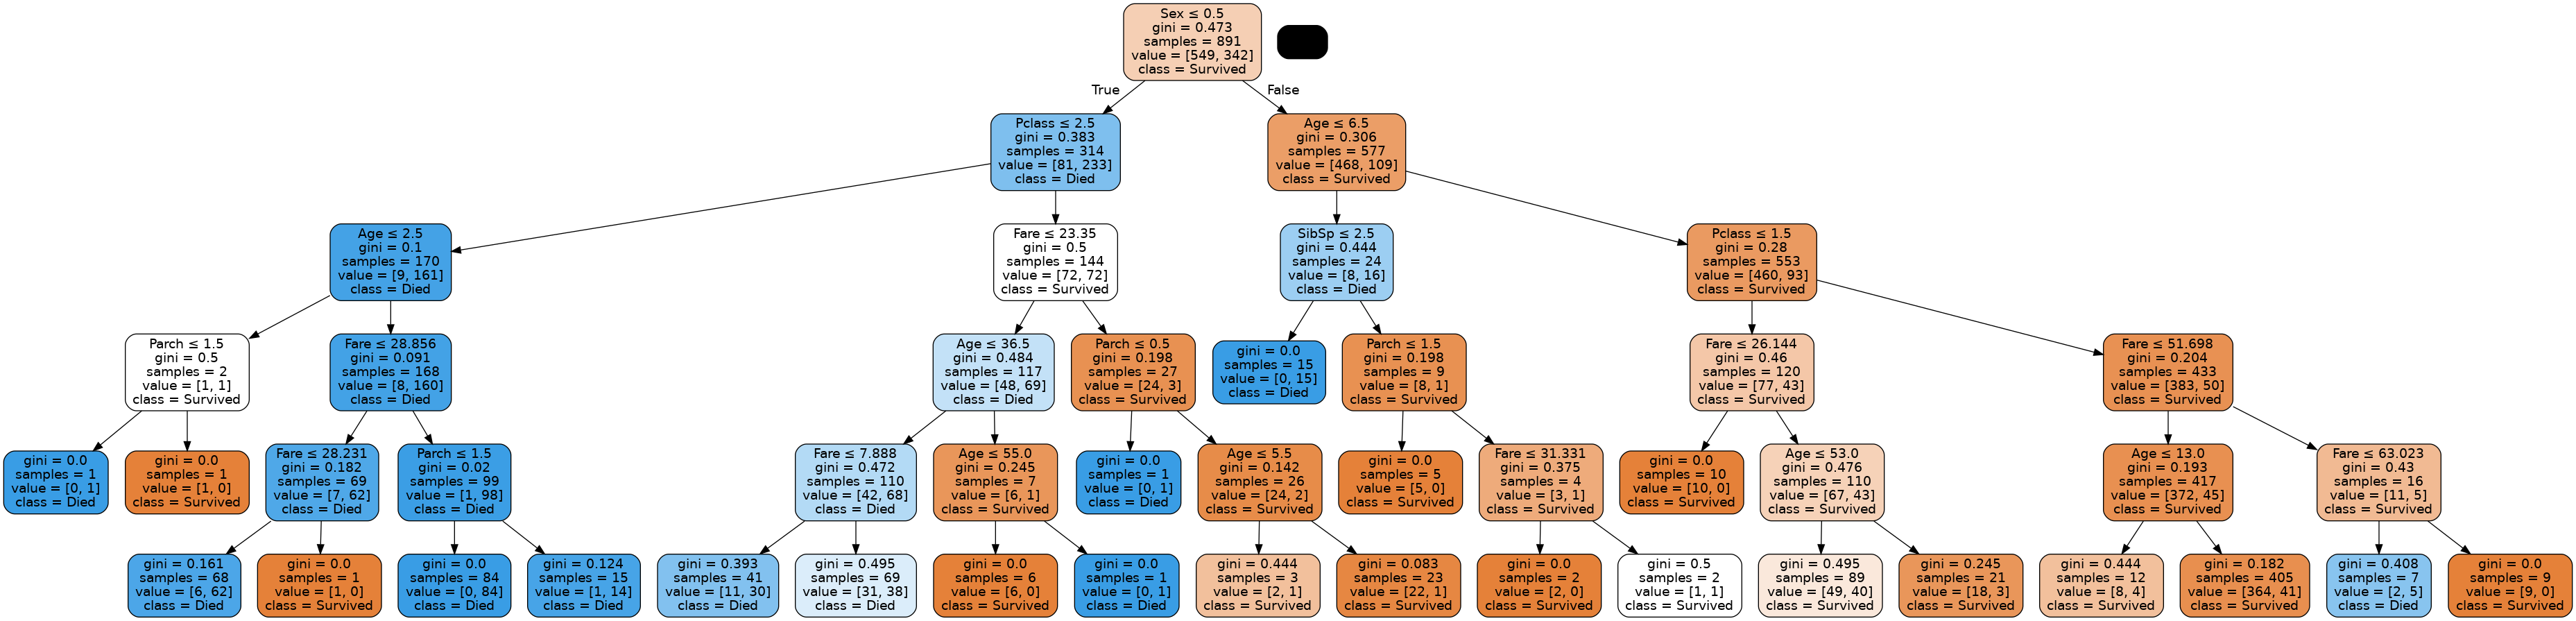

In [23]:
from six import StringIO
from IPython.display import Image
import pydotplus
import pydot

dotfile = StringIO()
tree.export_graphviz(forest_clf, 
                     out_file=dotfile,
                     feature_names=X_train.columns, 
                     class_names=['Survived', 'Died'], 
                     filled=True, 
                     rounded=True, 
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())

# Neural Net

In [256]:
clf = MLPClassifier(hidden_layer_sizes=(10,10,10,),
                    activation='logistic', # reLu, tanh, identity, logistic
                    max_iter=200,
                    solver='lbfgs',
                    verbose=1,
                    random_state=42) # may revert to default for test submission

### Preprocessing

In [91]:
df_rand

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket Prefix,Ticket Number,Prefix Probability,Deck,Deck Probability
355,356,0,3,"Vanden Steen, Mr. Leo Peter",1,28.0,0,0,345783,9.5000,NaN,S,_,_,0.754824,D,0.157775
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",0,50.0,0,1,230433,26.0000,NaN,S,_,_,0.754824,B,0.227015
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0,1,2,113781,151.5500,C22 C26,S,_,_,0.754824,C,0.291714
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",0,NaN,0,0,35852,7.7333,NaN,Q,_,_,0.754824,B,0.227015
399,400,1,2,"Trout, Mrs. William H (Jessie L)",0,28.0,0,0,240929,12.6500,NaN,S,_,_,0.754824,C,0.291714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,109,0,3,"Rekic, Mr. Tido",1,38.0,0,0,349249,7.8958,NaN,S,_,_,0.754824,D,0.157775
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",0,63.0,1,0,13502,77.9583,D7,S,_,_,0.754824,D,0.157775
869,870,1,3,"Johnson, Master. Harold Theodor",1,4.0,1,1,347742,11.1333,NaN,S,_,_,0.754824,G,0.019296
441,442,0,3,"Hampe, Mr. Leon",1,20.0,0,0,345769,9.5000,NaN,S,_,_,0.754824,B,0.227015


In [263]:
# X_train = train_rand.copy().drop(['Survived','Embarked'], axis=1)
# X_test = test_rand.copy().drop(['Survived','Embarked'], axis=1)

# # one-hot encode
# X_train = pd.get_dummies(X_train, columns=['Pclass','Sex','Ticket Prefix','Ticket Number'])
# X_test = pd.get_dummies(X_test, columns=['Pclass','Sex','Ticket Prefix','Ticket Number'])

# banned features: 'Survived','Embarked','PassengerId','Name','Ticket','Cabin'

#### TODO: create a mapping that takes ticket numbers and assigns a Deck

# relies on df_rand, which relies on df_train
encoding_prep = df_rand.drop(columns=['Ticket','Ticket Number', 'Cabin','Name','PassengerId','Ticket Prefix'], axis=1)
encoding_prep['Age'] = encoding_prep['Age'].fillna(df_train['Age'].mean())
encoding_prep = encoding_prep.dropna()

#encoding_prep['Age'] = encoding_prep['Age'].apply(lambda x: (x - min(encoding_prep['Age'])) / (max(encoding_prep['Age']) - min(encoding_prep['Age'])))
#encoding_prep['Prefix Probability'] = encoding_prep['Prefix Probability'].apply(lambda x: (x - min(encoding_prep['Prefix Probability'])) / (max(encoding_prep['Prefix Probability']) - min(encoding_prep['Prefix Probability'])))
#encoding_prep['Fare'] = encoding_prep['Fare'].apply(lambda x: (x - min(encoding_prep['Fare'])) / (max(encoding_prep['Fare']) - min(encoding_prep['Fare'])))

encoded = pd.get_dummies(encoding_prep, columns=['Pclass','Sex','Embarked', 'Deck'], dtype=int)
split_i = int(len(encoded)*0.8)

encoded_train = encoded.iloc[:split_i]
encoded_test = encoded.iloc[split_i:]

X_train = encoded_train.drop(columns=['Survived'])
X_test = encoded_test.drop(columns=['Survived'])

X_test

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G
583,36.000000,0,0,40.1250,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0
700,18.000000,1,0,227.5250,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
621,42.000000,1,0,52.5542,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
748,19.000000,1,0,53.1000,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
737,35.000000,0,0,512.3292,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0
136,19.000000,0,2,26.2833,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
27,19.000000,3,2,263.0000,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
782,29.000000,0,0,30.0000,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
498,25.000000,1,2,151.5500,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0
867,31.000000,0,0,50.4958,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0


In [258]:
# fit and predict
clf.fit(X_train, encoded_train['Survived'])
print(clf.score(X_train, encoded_train['Survived']))
print(clf.score(X_test, encoded_test['Survived']))


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          431     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.10239D-01    |proj g|=  2.94857D-01

At iterate    1    f=  6.81151D-01    |proj g|=  1.32348D-01

At iterate    2    f=  6.33517D-01    |proj g|=  2.29101D-02

At iterate    3    f=  6.32158D-01    |proj g|=  9.98515D-03

At iterate    4    f=  6.31989D-01    |proj g|=  8.62190D-03

At iterate    5    f=  6.31459D-01    |proj g|=  2.17060D-03

At iterate    6    f=  6.24537D-01    |proj g|=  9.33798D-03

At iterate    7    f=  6.15525D-01    |proj g|=  1.58681D-02

At iterate    8    f=  6.08607D-01    |proj g|=  3.65476D-02

At iterate    9    f=  5.99960D-01    |proj g|=  1.99196D-02

At iterate   10    f=  5.95975D-01    |proj g|=  6.83499D-02

At iterate   11    f=  5.89291D-01    |proj g|=  1.01136D-01

At iterate   12    f=  5.84773D-01    |proj g|=  1.49883D-02

At iterate   13    f=  5.8

In [251]:
# cross validation
cross_validate(clf, encoded.drop(columns=['Survived']), encoded['Survived'])


At iterate  145    f=  4.07629D-01    |proj g|=  8.50099D-02

At iterate  146    f=  4.07400D-01    |proj g|=  2.94929D-01

At iterate  147    f=  4.07062D-01    |proj g|=  1.14459D-01

At iterate  148    f=  4.06779D-01    |proj g|=  5.77122D-02

At iterate  149    f=  4.06540D-01    |proj g|=  8.72753D-02

At iterate  150    f=  4.06047D-01    |proj g|=  8.01296D-02

At iterate  151    f=  4.02810D-01    |proj g|=  9.05253D-02

At iterate  152    f=  4.00839D-01    |proj g|=  2.28649D-01

At iterate  153    f=  3.99260D-01    |proj g|=  2.45155D-01

At iterate  154    f=  3.97157D-01    |proj g|=  1.27967D-01

At iterate  155    f=  3.95939D-01    |proj g|=  2.70061D-01

At iterate  156    f=  3.92740D-01    |proj g|=  2.00721D-01

At iterate  157    f=  3.90518D-01    |proj g|=  3.26341D-01

At iterate  158    f=  3.89486D-01    |proj g|=  1.72368D-01

At iterate  159    f=  3.88050D-01    |proj g|=  2.95383D-01

At iterate  160    f=  3.86165D-01    |proj g|=  3.32644D-01

At iter

{'fit_time': array([0.17991614, 0.17140245, 0.16710258, 0.17333198, 0.15777111]),
 'score_time': array([0.00348616, 0.00332928, 0.0021081 , 0.00211549, 0.00235748]),
 'test_score': array([0.775     , 0.8       , 0.675     , 0.725     , 0.69230769])}

### Predicting on actual data

In [95]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [277]:
# preprocessing prefixes
# test_tickets = df_test['Ticket'].str.extract(r"(.+\s)*(\d*)")
# test_tickets.fillna('_', inplace=True)
# df_test[['Ticket Prefix','Ticket Number']] = test_tickets

# prefix extraction
tickets = df_test['Ticket'].str.extract(r"(.+\s|\w+\s)(\d*)*")
tickets.fillna('_', inplace=True)
df_test[['Ticket Prefix','Ticket Number']] = tickets
df_test['Ticket Prefix'] = df_test['Ticket Prefix'].str.replace(r"\.| |\/",'', regex=True).str.upper()

# # prefix probs
# probabilities = df_test['Ticket Prefix'].value_counts() / df_test.shape[0]
# df_test['Prefix Probability'] = df_test['Ticket Prefix'].map(probabilities)

# impute underscore deck
df_test['Deck'] = df_test['Cabin'].str.extract(r"([A-Za-z]+)")
all_decks_test = df_test[~df_test['Deck'].isnull()]

prefixes_test = df_test['Ticket Prefix'].unique()
valid_decks = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

null_groups_test = all_decks_test[all_decks_test['PassengerId'] == 0]

for prefix in prefixes_test:
    prefix_df = df_test[df_test['Ticket Prefix'] == prefix]
    prefix_df_notna = prefix_df[~prefix_df['Deck'].isnull()]
    prefix_df_na = prefix_df[prefix_df['Deck'].isnull()]

    if prefix[0] in valid_decks: # check if ticket prefix matches deck
        prefix_df_na['Deck'] = prefix[0]
        prefix_df = pd.concat([prefix_df_notna,prefix_df_na])
        all_decks_test = pd.concat([all_decks_test,prefix_df_na])
    elif prefix_df_notna.shape[0] == 0: # 
        null_groups_test = pd.concat([null_groups_test, prefix_df])
    else: # impute based on distribution
        prefix_df_na = impute_decks(prefix_df_na, prefix_df_notna, 'Deck')
        all_decks_test = pd.concat([all_decks_test,prefix_df_na])
    
null_groups_test = impute_decks(null_groups_test, df_test[~df_test['Deck'].isnull()], 'Deck')
all_decks_test = pd.concat([all_decks_test,null_groups_test])
all_decks_test = all_decks_test.sort_values(by='PassengerId')

print(len(all_decks_test))
print(len(null_groups_test))

# make a note of what is dropped, as potential targets for the future
test_set = all_decks_test.drop(['Ticket','Ticket Number','Cabin','Name','PassengerId','Ticket Prefix'], axis=1).fillna(df_test['Age'].mean())
test_set = pd.get_dummies(test_set, columns=['Pclass','Sex','Embarked','Deck'])

neural_y_test_pred = clf.predict(test_set)
final_prediction = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': neural_y_test_pred})
final_prediction

418
26
/tmp/ipykernel_41/697485979.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prefix_df_na['Deck'] = prefix[0]


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [97]:
test_set

,Age,SibSp,Parch,Fare,Prefix Probability,Deck Probability,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S
0,34.50000,0,0,7.8292,0.708134,0.141148,False,False,True,False,True,False,True,False
1,47.00000,1,0,7.0000,0.708134,0.086124,False,False,True,True,False,False,False,True
2,62.00000,0,0,9.6875,0.708134,0.196172,False,True,False,False,True,False,True,False
3,27.00000,0,0,8.6625,0.708134,0.382775,False,False,True,False,True,False,False,True
4,22.00000,1,1,12.2875,0.708134,0.098086,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.27259,0,0,8.0500,0.016746,0.141148,False,False,True,False,True,False,False,True
414,39.00000,0,0,108.9000,0.076555,0.382775,True,False,False,True,False,True,False,False
415,38.50000,0,0,7.2500,0.021531,0.382775,False,False,True,False,True,False,False,True
416,30.27259,0,0,8.0500,0.708134,0.076555,False,False,True,False,True,False,False,True


# Compile + Submit

In [289]:
# uncomment when preparing submission
final_prediction.to_csv('my_prediction.csv',index=False)

Notes:

-one hot encode passenger class

-note to rebecca: we are doing probability encoding on ticket prefix (I personally rec we min-max normalize)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=60e7bd97-0b1a-4e83-8250-92f6e406fd20' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>